## imports

In [1]:
market = 'EWR-CDG'

In [2]:
import datetime
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
BASE_INPUT_DIR = "../../../data/carrier-consistency"
data_types = ["ow_out_cxr_crude", "ow_out_cxr_nuanced", "rt_out_cxr_crude", "rt_out_cxr_nuanced", "rt_in_cxr_crude"]

# one-ways (out-bound)

In [4]:
data_idx = 0
print(data_types[data_idx])
input_dir = f'{BASE_INPUT_DIR}/{data_types[data_idx]}/'

# there should only be 1 csv file per input folder
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, header=0)

ow_out_cxr_crude


In [6]:
cxr_col = 'out_cxr'
dow_col = 'out_dt_dow_int'

In [ ]:
m_df = df[df['market'] == market]

## overall summary by carrier

In [7]:
m_df = df[df['market'] == market]

cxr_summary = m_df.groupby(cxr_col).agg(
    {'count': 'sum',
     'pct_count': 'sum'}
)
cxr_summary.reset_index(inplace=True)
cxr_summary.sort_values(by='count', ascending=False, inplace=True)
cxr_summary.reset_index(inplace=True, drop=True)

# cxr_summary.head(10)

,out_cxr,count,pct_count
0,UA,86991,0.345794
1,AC,55793,0.221780
2,SK,52977,0.210586
3,FI,32558,0.129420
4,DL,8058,0.032031
5,TK,5077,0.020181
6,AA,4310,0.017132
7,EI,1915,0.007612
8,VS,1252,0.004977
9,LH,696,0.002767


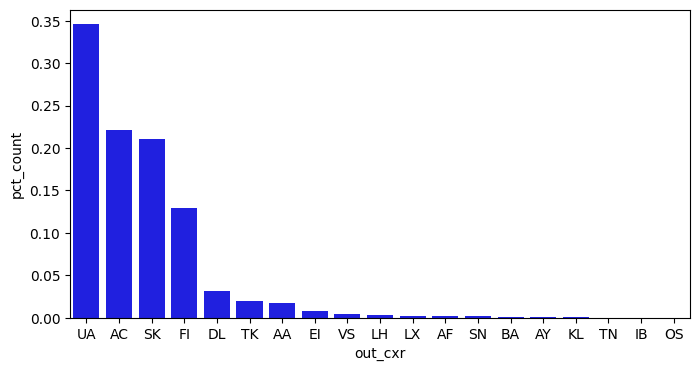

In [12]:
plt.figure(figsize=(8,4))
sns.barplot(cxr_summary, x=cxr_col, y='pct_count', color='blue');
plt.xticks(rotation=90);

In [8]:
top_n_cxr = 5
top_cxr = cxr_summary.loc[:(top_n_cxr-1), cxr_col].to_list()

## DTD

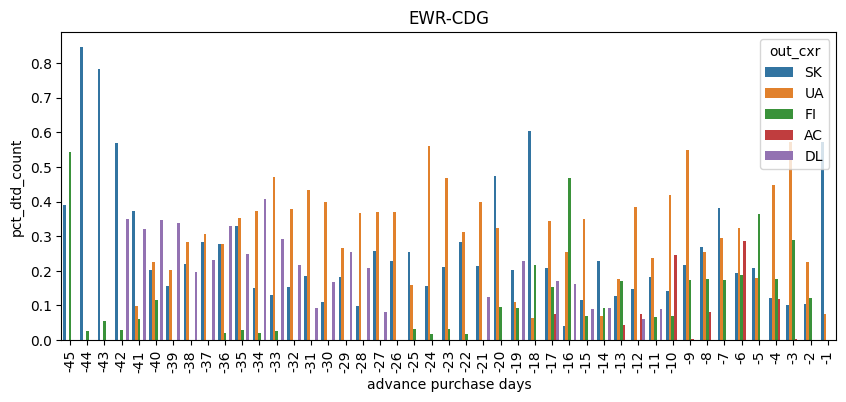

In [9]:
dtd_grp = m_df.groupby(["days_til_dept", cxr_col]).agg(
    {'count': 'sum',
    }
)
dtd_grp.reset_index(inplace=True)
dtd_grp.sort_values(by=['days_til_dept', 'count'], ascending=[True, False], inplace=True)
dtd_grp['dtd_rank'] = dtd_grp.groupby("days_til_dept")['count'].rank(method='dense', ascending=False)
dtd_grp['dtd_count'] = dtd_grp.groupby("days_til_dept")['count'].transform('sum')
dtd_grp['pct_dtd_count'] = dtd_grp['count'] / dtd_grp['dtd_count']

top_cxr_dtd_data = dtd_grp[(dtd_grp['dtd_rank'] <= top_n_cxr) & (dtd_grp[cxr_col].isin(top_cxr))]

dtd_cutoff = 45
plt.figure(figsize=(10,4))
plot_data = top_cxr_dtd_data[top_cxr_dtd_data['days_til_dept'] <= dtd_cutoff]
sns.barplot(
    plot_data,
    x=-plot_data['days_til_dept'],
    y='pct_dtd_count',
    hue=cxr_col
);
plt.xlabel("advance purchase days")
plt.xticks(rotation=90);
plt.title(market);

## DOW

In [10]:
dow_grp = m_df.groupby([dow_col, cxr_col]).agg({'count': 'sum'})
dow_grp.reset_index(inplace=True)
dow_grp.sort_values(by=[dow_col, 'count'], ascending=[True, False], inplace=True)
dow_grp['dow_rank'] = dow_grp.groupby(dow_col)['count'].rank(method='dense', ascending=False)
dow_grp['dow_count'] = dow_grp.groupby(dow_col)['count'].transform('sum')
dow_grp['pct_dow_count'] = dow_grp['count'] / dow_grp['dow_count']

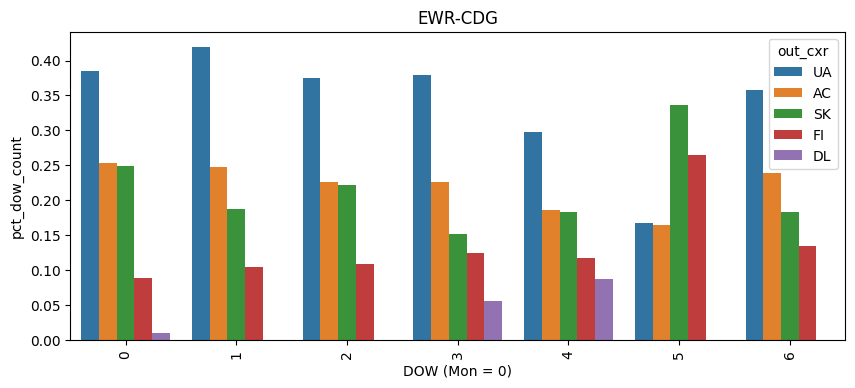

In [11]:
top_cxr_dow_data = dow_grp[(dow_grp['dow_rank'] <= top_n_cxr) & (dow_grp[cxr_col].isin(top_cxr))]

plt.figure(figsize=(10,4))
plot_data = top_cxr_dow_data.copy()
sns.barplot(
    plot_data,
    x=dow_col,
    y='pct_dow_count',
    hue=cxr_col
);
plt.xlabel("DOW (Mon = 0)")
plt.xticks(rotation=90);
plt.title(market);

# one-ways - including inter-line

In [13]:
data_idx = 1
input_dir = f'{BASE_INPUT_DIR}/{data_types[data_idx]}/'

# there should only be 1 csv file per input folder
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, header=0)

m_df = df[df['market'] == market]

In [15]:
df.head()

,market,round_trip,days_til_dept,out_dt_dow_int,in_dt_dow_int,out_uni_cxr_concat,count,count_market,pct_count,cum_pct
0,JFK-LHR,0,61,5,NaN,TP,3288,1284485,0.002560,0.002560
1,JFK-LHR,0,60,4,NaN,TP,3214,1284485,0.002502,0.005062
2,JFK-LHR,0,65,2,NaN,TP,3107,1284485,0.002419,0.007481
3,JFK-LHR,0,2,6,NaN,DL,2961,1284485,0.002305,0.009786
4,JFK-LHR,0,66,2,NaN,TP,2849,1284485,0.002218,0.012004


In [16]:
cxr_col = 'out_uni_cxr_concat'
dow_col = 'out_dt_dow_int'

## overall summary by carrier

In [ ]:
cxr_summary = m_df.groupby(cxr_col).agg(
    {'count': 'sum',
     'pct_count': 'sum'}
)
cxr_summary.reset_index(inplace=True)
cxr_summary.sort_values(by='count', ascending=False, inplace=True)
cxr_summary.reset_index(inplace=True, drop=True)

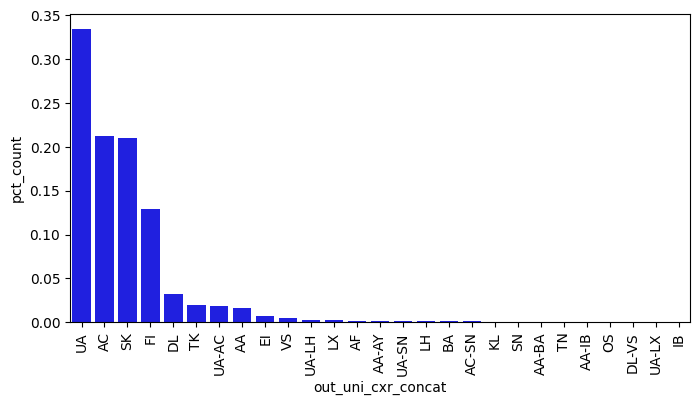

In [22]:
plt.figure(figsize=(8,4))
sns.barplot(cxr_summary, x=cxr_col, y='pct_count', color='blue');
plt.xticks(rotation=90);

In [23]:
top_n_cxr = 5
top_cxr = cxr_summary.loc[:(top_n_cxr-1), 'out_uni_cxr_concat'].to_list()

## DTD

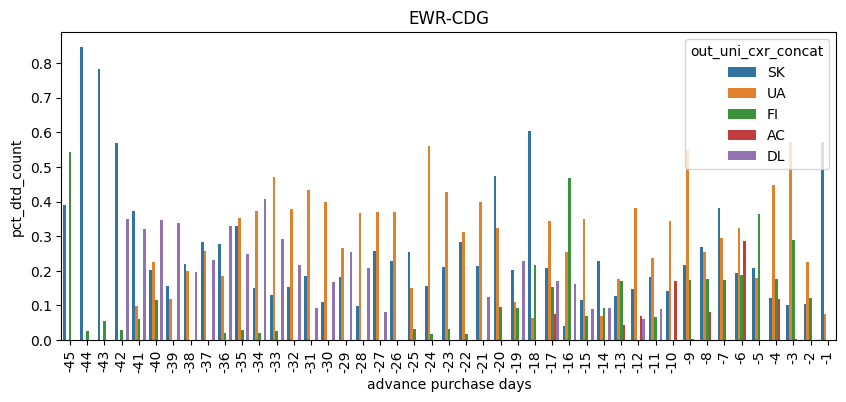

In [24]:
dtd_grp = m_df.groupby(["days_til_dept", "out_uni_cxr_concat"]).agg(
    {'count': 'sum',
    }
)

dtd_grp.reset_index(inplace=True)
dtd_grp.sort_values(by=['days_til_dept', 'count'], ascending=[True, False], inplace=True)
dtd_grp['dtd_rank'] = dtd_grp.groupby("days_til_dept")['count'].rank(method='dense', ascending=False)
dtd_grp['dtd_count'] = dtd_grp.groupby("days_til_dept")['count'].transform('sum')
dtd_grp['pct_dtd_count'] = dtd_grp['count'] / dtd_grp['dtd_count']

top_cxr_dtd_data = dtd_grp[(dtd_grp['dtd_rank'] <= top_n_cxr) & (dtd_grp['out_uni_cxr_concat'].isin(top_cxr))]

dtd_cutoff = 45
plt.figure(figsize=(10,4))
plot_data = top_cxr_dtd_data[top_cxr_dtd_data['days_til_dept'] <= dtd_cutoff]
sns.barplot(
    plot_data,
    x=-plot_data['days_til_dept'],
    y='pct_dtd_count',
    hue='out_uni_cxr_concat'
);
plt.xlabel("advance purchase days")
plt.xticks(rotation=90);
plt.title(market);

## DOW

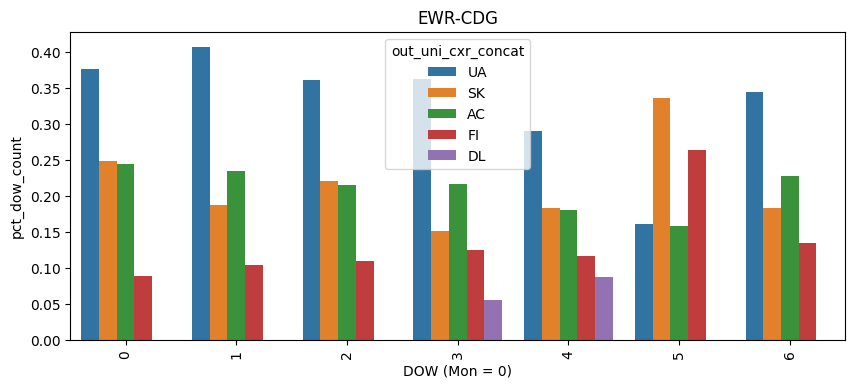

In [25]:
dow_grp = m_df.groupby(['out_dt_dow_int', 'out_uni_cxr_concat']).agg({'count': 'sum'})
dow_grp.reset_index(inplace=True)
dow_grp.sort_values(by=['out_dt_dow_int', 'count'], ascending=[True, False], inplace=True)
dow_grp['dow_rank'] = dow_grp.groupby("out_dt_dow_int")['count'].rank(method='dense', ascending=False)
dow_grp['dow_count'] = dow_grp.groupby("out_dt_dow_int")['count'].transform('sum')
dow_grp['pct_dow_count'] = dow_grp['count'] / dow_grp['dow_count']

top_cxr_dow_data = dow_grp[(dow_grp['dow_rank'] <= top_n_cxr) & (dow_grp['out_uni_cxr_concat'].isin(top_cxr))]

plt.figure(figsize=(10,4))
plot_data = top_cxr_dow_data.copy()
sns.barplot(
    plot_data,
    x='out_dt_dow_int',
    y='pct_dow_count',
    hue='out_uni_cxr_concat'
);
plt.xlabel("DOW (Mon = 0)")
plt.xticks(rotation=90);
plt.title(market);

# round-trip, out-bound

In [26]:
data_idx = 2
print(data_types[data_idx])
input_dir = f'{BASE_INPUT_DIR}/{data_types[data_idx]}/'

# there should only be 1 csv file per input folder
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, header=0)
        
m_df = df[df['market'] == market]

rt_out_cxr_crude


In [27]:
cxr_col = 'out_cxr'
dow_col = 'out_dt_dow_int'

## overall summary by carrier

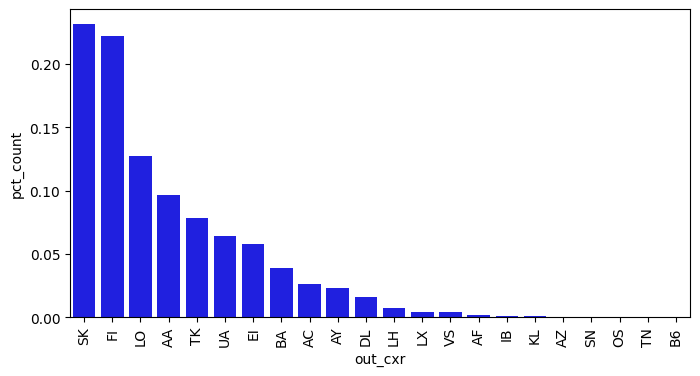

In [28]:
cxr_summary = m_df.groupby(cxr_col).agg(
    {'count': 'sum',
     'pct_count': 'sum'}
)
cxr_summary.reset_index(inplace=True)
cxr_summary.sort_values(by='count', ascending=False, inplace=True)
cxr_summary.reset_index(inplace=True, drop=True)

# cxr_summary.head(10)

plt.figure(figsize=(8,4))
sns.barplot(cxr_summary, x=cxr_col, y='pct_count', color='blue');
plt.xticks(rotation=90);

In [29]:
top_n_cxr = 4
top_cxr = cxr_summary.loc[:(top_n_cxr-1), cxr_col].to_list()

## DTD

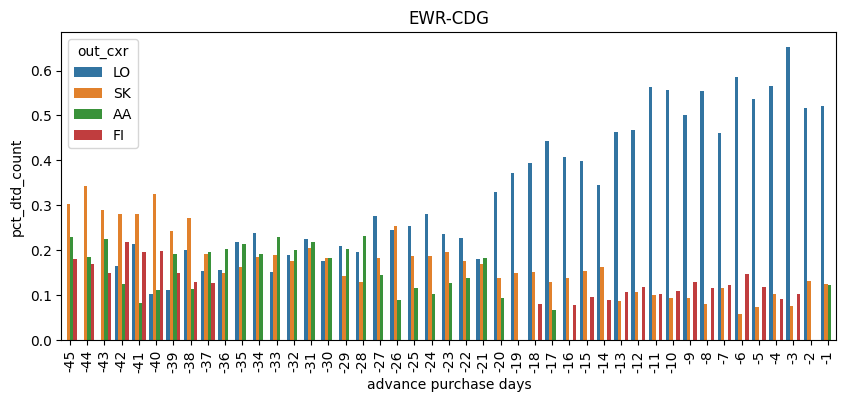

In [30]:
dtd_grp = m_df.groupby(["days_til_dept", cxr_col]).agg(
    {'count': 'sum',
    }
)
dtd_grp.reset_index(inplace=True)
dtd_grp.sort_values(by=['days_til_dept', 'count'], ascending=[True, False], inplace=True)
dtd_grp['dtd_rank'] = dtd_grp.groupby("days_til_dept")['count'].rank(method='dense', ascending=False)
dtd_grp['dtd_count'] = dtd_grp.groupby("days_til_dept")['count'].transform('sum')
dtd_grp['pct_dtd_count'] = dtd_grp['count'] / dtd_grp['dtd_count']

top_cxr_dtd_data = dtd_grp[(dtd_grp['dtd_rank'] <= top_n_cxr) & (dtd_grp[cxr_col].isin(top_cxr))]

dtd_cutoff = 45
plt.figure(figsize=(10,4))
plot_data = top_cxr_dtd_data[top_cxr_dtd_data['days_til_dept'] <= dtd_cutoff]
sns.barplot(
    plot_data,
    x=-plot_data['days_til_dept'],
    y='pct_dtd_count',
    hue=cxr_col
);
plt.xlabel("advance purchase days")
plt.xticks(rotation=90);
plt.title(market);

## DOW

In [31]:
dow_grp = m_df.groupby([dow_col, cxr_col]).agg({'count': 'sum'})
dow_grp.reset_index(inplace=True)
dow_grp.sort_values(by=[dow_col, 'count'], ascending=[True, False], inplace=True)
dow_grp['dow_rank'] = dow_grp.groupby(dow_col)['count'].rank(method='dense', ascending=False)
dow_grp['dow_count'] = dow_grp.groupby(dow_col)['count'].transform('sum')
dow_grp['pct_dow_count'] = dow_grp['count'] / dow_grp['dow_count']

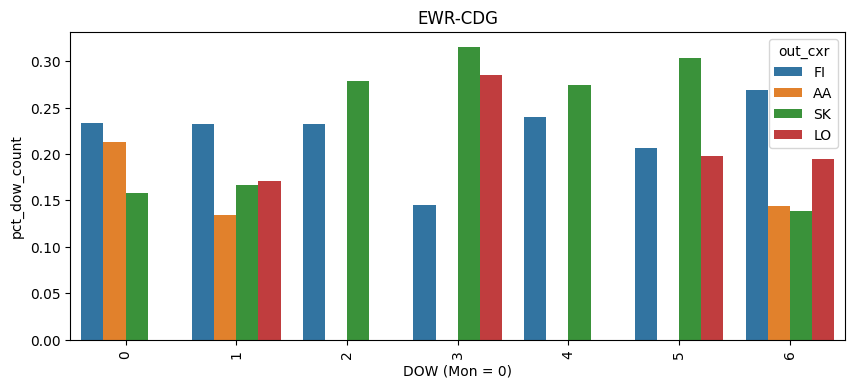

In [32]:
top_cxr_dow_data = dow_grp[(dow_grp['dow_rank'] <= top_n_cxr) & (dow_grp[cxr_col].isin(top_cxr))]

plt.figure(figsize=(10,4))
plot_data = top_cxr_dow_data.copy()
sns.barplot(
    plot_data,
    x=dow_col,
    y='pct_dow_count',
    hue=cxr_col
);
plt.xlabel("DOW (Mon = 0)")
plt.xticks(rotation=90);
plt.title(market);

# round-trip, out-bound, including inter-lines

In [33]:
data_idx = 3
print(data_types[data_idx])
input_dir = f'{BASE_INPUT_DIR}/{data_types[data_idx]}/'

# there should only be 1 csv file per input folder
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, header=0)
        
m_df = df[df['market'] == market]

cxr_col = 'out_uni_cxr_concat'
dow_col = 'out_dt_dow_int'

rt_out_cxr_nuanced


## overall summary by carrier

In [34]:
cxr_summary = m_df.groupby(cxr_col).agg(
    {'count': 'sum',
     'pct_count': 'sum'}
)
cxr_summary.reset_index(inplace=True)
cxr_summary.sort_values(by='count', ascending=False, inplace=True)
cxr_summary.reset_index(inplace=True, drop=True)

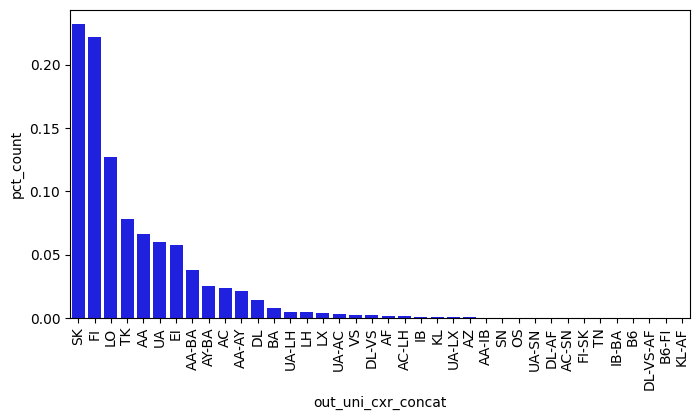

In [35]:
# cxr_summary.head(10)

plt.figure(figsize=(8,4))
sns.barplot(cxr_summary, x=cxr_col, y='pct_count', color='blue');
plt.xticks(rotation=90);

In [36]:
top_n_cxr = 4
top_cxr = cxr_summary.loc[:(top_n_cxr-1), cxr_col].to_list()

## DTD

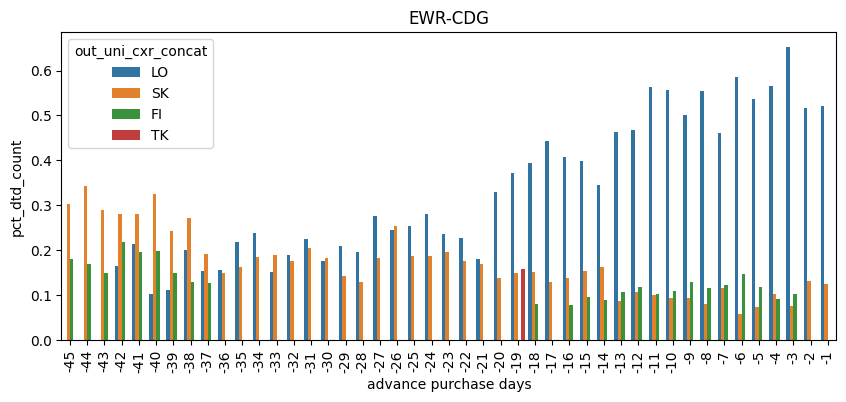

In [37]:
dtd_grp = m_df.groupby(["days_til_dept", cxr_col]).agg(
    {'count': 'sum',
    }
)
dtd_grp.reset_index(inplace=True)
dtd_grp.sort_values(by=['days_til_dept', 'count'], ascending=[True, False], inplace=True)
dtd_grp['dtd_rank'] = dtd_grp.groupby("days_til_dept")['count'].rank(method='dense', ascending=False)
dtd_grp['dtd_count'] = dtd_grp.groupby("days_til_dept")['count'].transform('sum')
dtd_grp['pct_dtd_count'] = dtd_grp['count'] / dtd_grp['dtd_count']

top_cxr_dtd_data = dtd_grp[(dtd_grp['dtd_rank'] <= top_n_cxr) & (dtd_grp[cxr_col].isin(top_cxr))]

dtd_cutoff = 45
plt.figure(figsize=(10,4))
plot_data = top_cxr_dtd_data[top_cxr_dtd_data['days_til_dept'] <= dtd_cutoff]
sns.barplot(
    plot_data,
    x=-plot_data['days_til_dept'],
    y='pct_dtd_count',
    hue=cxr_col
);
plt.xlabel("advance purchase days")
plt.xticks(rotation=90);
plt.title(market);

## DOW

In [38]:
dow_grp = m_df.groupby([dow_col, cxr_col]).agg({'count': 'sum'})
dow_grp.reset_index(inplace=True)
dow_grp.sort_values(by=[dow_col, 'count'], ascending=[True, False], inplace=True)
dow_grp['dow_rank'] = dow_grp.groupby(dow_col)['count'].rank(method='dense', ascending=False)
dow_grp['dow_count'] = dow_grp.groupby(dow_col)['count'].transform('sum')
dow_grp['pct_dow_count'] = dow_grp['count'] / dow_grp['dow_count']

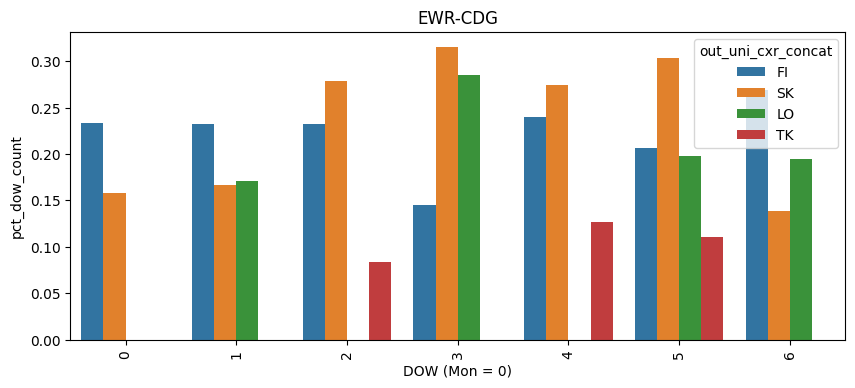

In [39]:
top_cxr_dow_data = dow_grp[(dow_grp['dow_rank'] <= top_n_cxr) & (dow_grp[cxr_col].isin(top_cxr))]

plt.figure(figsize=(10,4))
plot_data = top_cxr_dow_data.copy()
sns.barplot(
    plot_data,
    x=dow_col,
    y='pct_dow_count',
    hue=cxr_col
);
plt.xlabel("DOW (Mon = 0)")
plt.xticks(rotation=90);
plt.title(market);

# round-trip, in-bound

In [40]:
data_idx = 4
print(data_types[data_idx])
input_dir = f'{BASE_INPUT_DIR}/{data_types[data_idx]}/'

# there should only be 1 csv file per input folder
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, header=0)
        
m_df = df[df['market'] == market]

cxr_col = 'in_cxr'
dow_col = 'in_dt_dow_int'

rt_in_cxr_crude


## overall summary by carrier

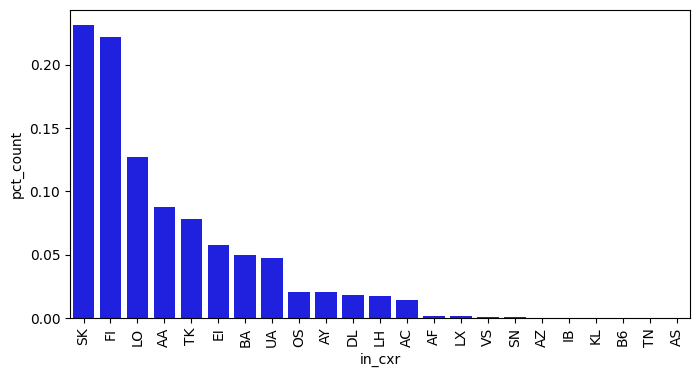

In [41]:
cxr_summary = m_df.groupby(cxr_col).agg(
    {'count': 'sum',
     'pct_count': 'sum'}
)
cxr_summary.reset_index(inplace=True)
cxr_summary.sort_values(by='count', ascending=False, inplace=True)
cxr_summary.reset_index(inplace=True, drop=True)

# cxr_summary.head(10)

plt.figure(figsize=(8,4))
sns.barplot(cxr_summary, x=cxr_col, y='pct_count', color='blue');
plt.xticks(rotation=90);

In [42]:
top_n_cxr = 4
top_cxr = cxr_summary.loc[:(top_n_cxr-1), cxr_col].to_list()

## DTD

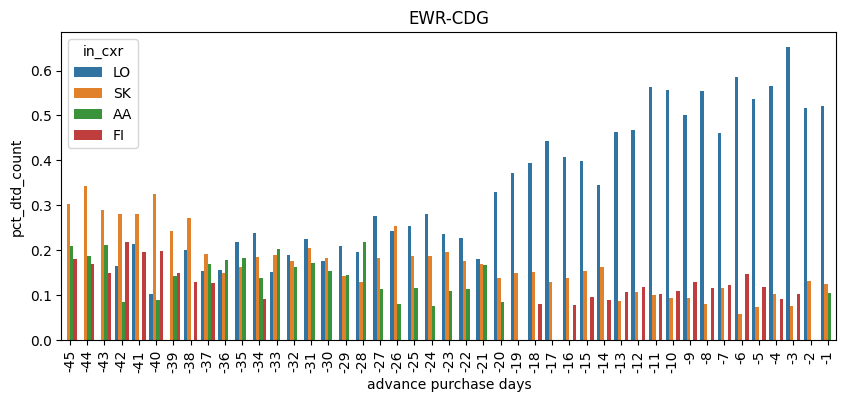

In [43]:
dtd_grp = m_df.groupby(["days_til_dept", cxr_col]).agg(
    {'count': 'sum',
    }
)
dtd_grp.reset_index(inplace=True)
dtd_grp.sort_values(by=['days_til_dept', 'count'], ascending=[True, False], inplace=True)
dtd_grp['dtd_rank'] = dtd_grp.groupby("days_til_dept")['count'].rank(method='dense', ascending=False)
dtd_grp['dtd_count'] = dtd_grp.groupby("days_til_dept")['count'].transform('sum')
dtd_grp['pct_dtd_count'] = dtd_grp['count'] / dtd_grp['dtd_count']

top_cxr_dtd_data = dtd_grp[(dtd_grp['dtd_rank'] <= top_n_cxr) & (dtd_grp[cxr_col].isin(top_cxr))]

dtd_cutoff = 45
plt.figure(figsize=(10,4))
plot_data = top_cxr_dtd_data[top_cxr_dtd_data['days_til_dept'] <= dtd_cutoff]
sns.barplot(
    plot_data,
    x=-plot_data['days_til_dept'],
    y='pct_dtd_count',
    hue=cxr_col
);
plt.xlabel("advance purchase days")
plt.xticks(rotation=90);
plt.title(market);

## DOW

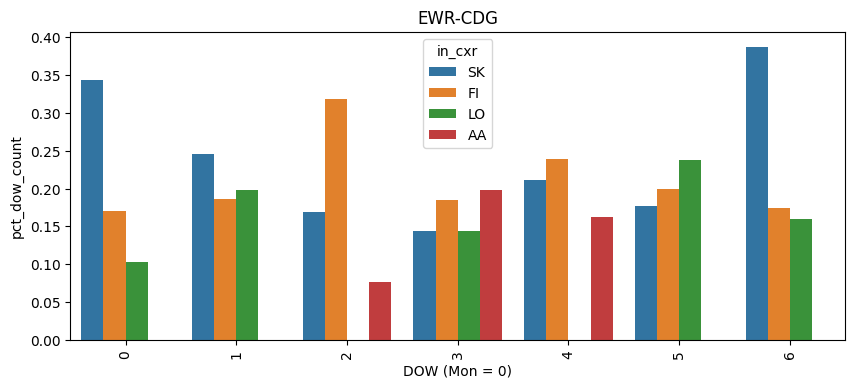

In [44]:
dow_grp = m_df.groupby([dow_col, cxr_col]).agg({'count': 'sum'})
dow_grp.reset_index(inplace=True)
dow_grp.sort_values(by=[dow_col, 'count'], ascending=[True, False], inplace=True)
dow_grp['dow_rank'] = dow_grp.groupby(dow_col)['count'].rank(method='dense', ascending=False)
dow_grp['dow_count'] = dow_grp.groupby(dow_col)['count'].transform('sum')
dow_grp['pct_dow_count'] = dow_grp['count'] / dow_grp['dow_count']

top_cxr_dow_data = dow_grp[(dow_grp['dow_rank'] <= top_n_cxr) & (dow_grp[cxr_col].isin(top_cxr))]

plt.figure(figsize=(10,4))
plot_data = top_cxr_dow_data.copy()
sns.barplot(
    plot_data,
    x=dow_col,
    y='pct_dow_count',
    hue=cxr_col
);
plt.xlabel("DOW (Mon = 0)")
plt.xticks(rotation=90);
plt.title(market);

# *next data type*

In [ ]:
data_idx = 
print(data_types[data_idx])
input_dir = f'{BASE_INPUT_DIR}/{data_types[data_idx]}/'

# there should only be 1 csv file per input folder
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, header=0)
        
m_df = df[df['market'] == market]

cxr_col = 'out_cxr'
dow_col = 'out_dt_dow_int'

## overall summary by carrier

In [ ]:
cxr_summary = m_df.groupby(cxr_col).agg(
    {'count': 'sum',
     'pct_count': 'sum'}
)
cxr_summary.reset_index(inplace=True)
cxr_summary.sort_values(by='count', ascending=False, inplace=True)
cxr_summary.reset_index(inplace=True, drop=True)

# cxr_summary.head(10)

plt.figure(figsize=(8,4))
sns.barplot(cxr_summary, x=cxr_col, y='pct_count', color='blue');
plt.xticks(rotation=90);

In [ ]:
top_n_cxr = 3
top_cxr = cxr_summary.loc[:(top_n_cxr-1), cxr_col].to_list()

## DTD

In [ ]:
dtd_grp = m_df.groupby(["days_til_dept", cxr_col]).agg(
    {'count': 'sum',
    }
)
dtd_grp.reset_index(inplace=True)
dtd_grp.sort_values(by=['days_til_dept', 'count'], ascending=[True, False], inplace=True)
dtd_grp['dtd_rank'] = dtd_grp.groupby("days_til_dept")['count'].rank(method='dense', ascending=False)
dtd_grp['dtd_count'] = dtd_grp.groupby("days_til_dept")['count'].transform('sum')
dtd_grp['pct_dtd_count'] = dtd_grp['count'] / dtd_grp['dtd_count']

top_cxr_dtd_data = dtd_grp[(dtd_grp['dtd_rank'] <= top_n_cxr) & (dtd_grp[cxr_col].isin(top_cxr))]

dtd_cutoff = 45
plt.figure(figsize=(10,4))
plot_data = top_cxr_dtd_data[top_cxr_dtd_data['days_til_dept'] <= dtd_cutoff]
sns.barplot(
    plot_data,
    x=-plot_data['days_til_dept'],
    y='pct_dtd_count',
    hue=cxr_col
);
plt.xlabel("advance purchase days")
plt.xticks(rotation=90);
plt.title(market);

## DOW

In [ ]:
dow_grp = m_df.groupby([dow_col, cxr_col]).agg({'count': 'sum'})
dow_grp.reset_index(inplace=True)
dow_grp.sort_values(by=[dow_col, 'count'], ascending=[True, False], inplace=True)
dow_grp['dow_rank'] = dow_grp.groupby(dow_col)['count'].rank(method='dense', ascending=False)
dow_grp['dow_count'] = dow_grp.groupby(dow_col)['count'].transform('sum')
dow_grp['pct_dow_count'] = dow_grp['count'] / dow_grp['dow_count']

top_cxr_dow_data = dow_grp[(dow_grp['dow_rank'] <= top_n_cxr) & (dow_grp[cxr_col].isin(top_cxr))]

plt.figure(figsize=(10,4))
plot_data = top_cxr_dow_data.copy()
sns.barplot(
    plot_data,
    x=dow_col,
    y='pct_dow_count',
    hue=cxr_col
);
plt.xlabel("DOW (Mon = 0)")
plt.xticks(rotation=90);
plt.title(market);